In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [4]:
df.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

In [8]:
numerical = ['Age','Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
categorical= ['Sex','Chest Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Slope','No. Major Blood Vessels','Thal Rate']

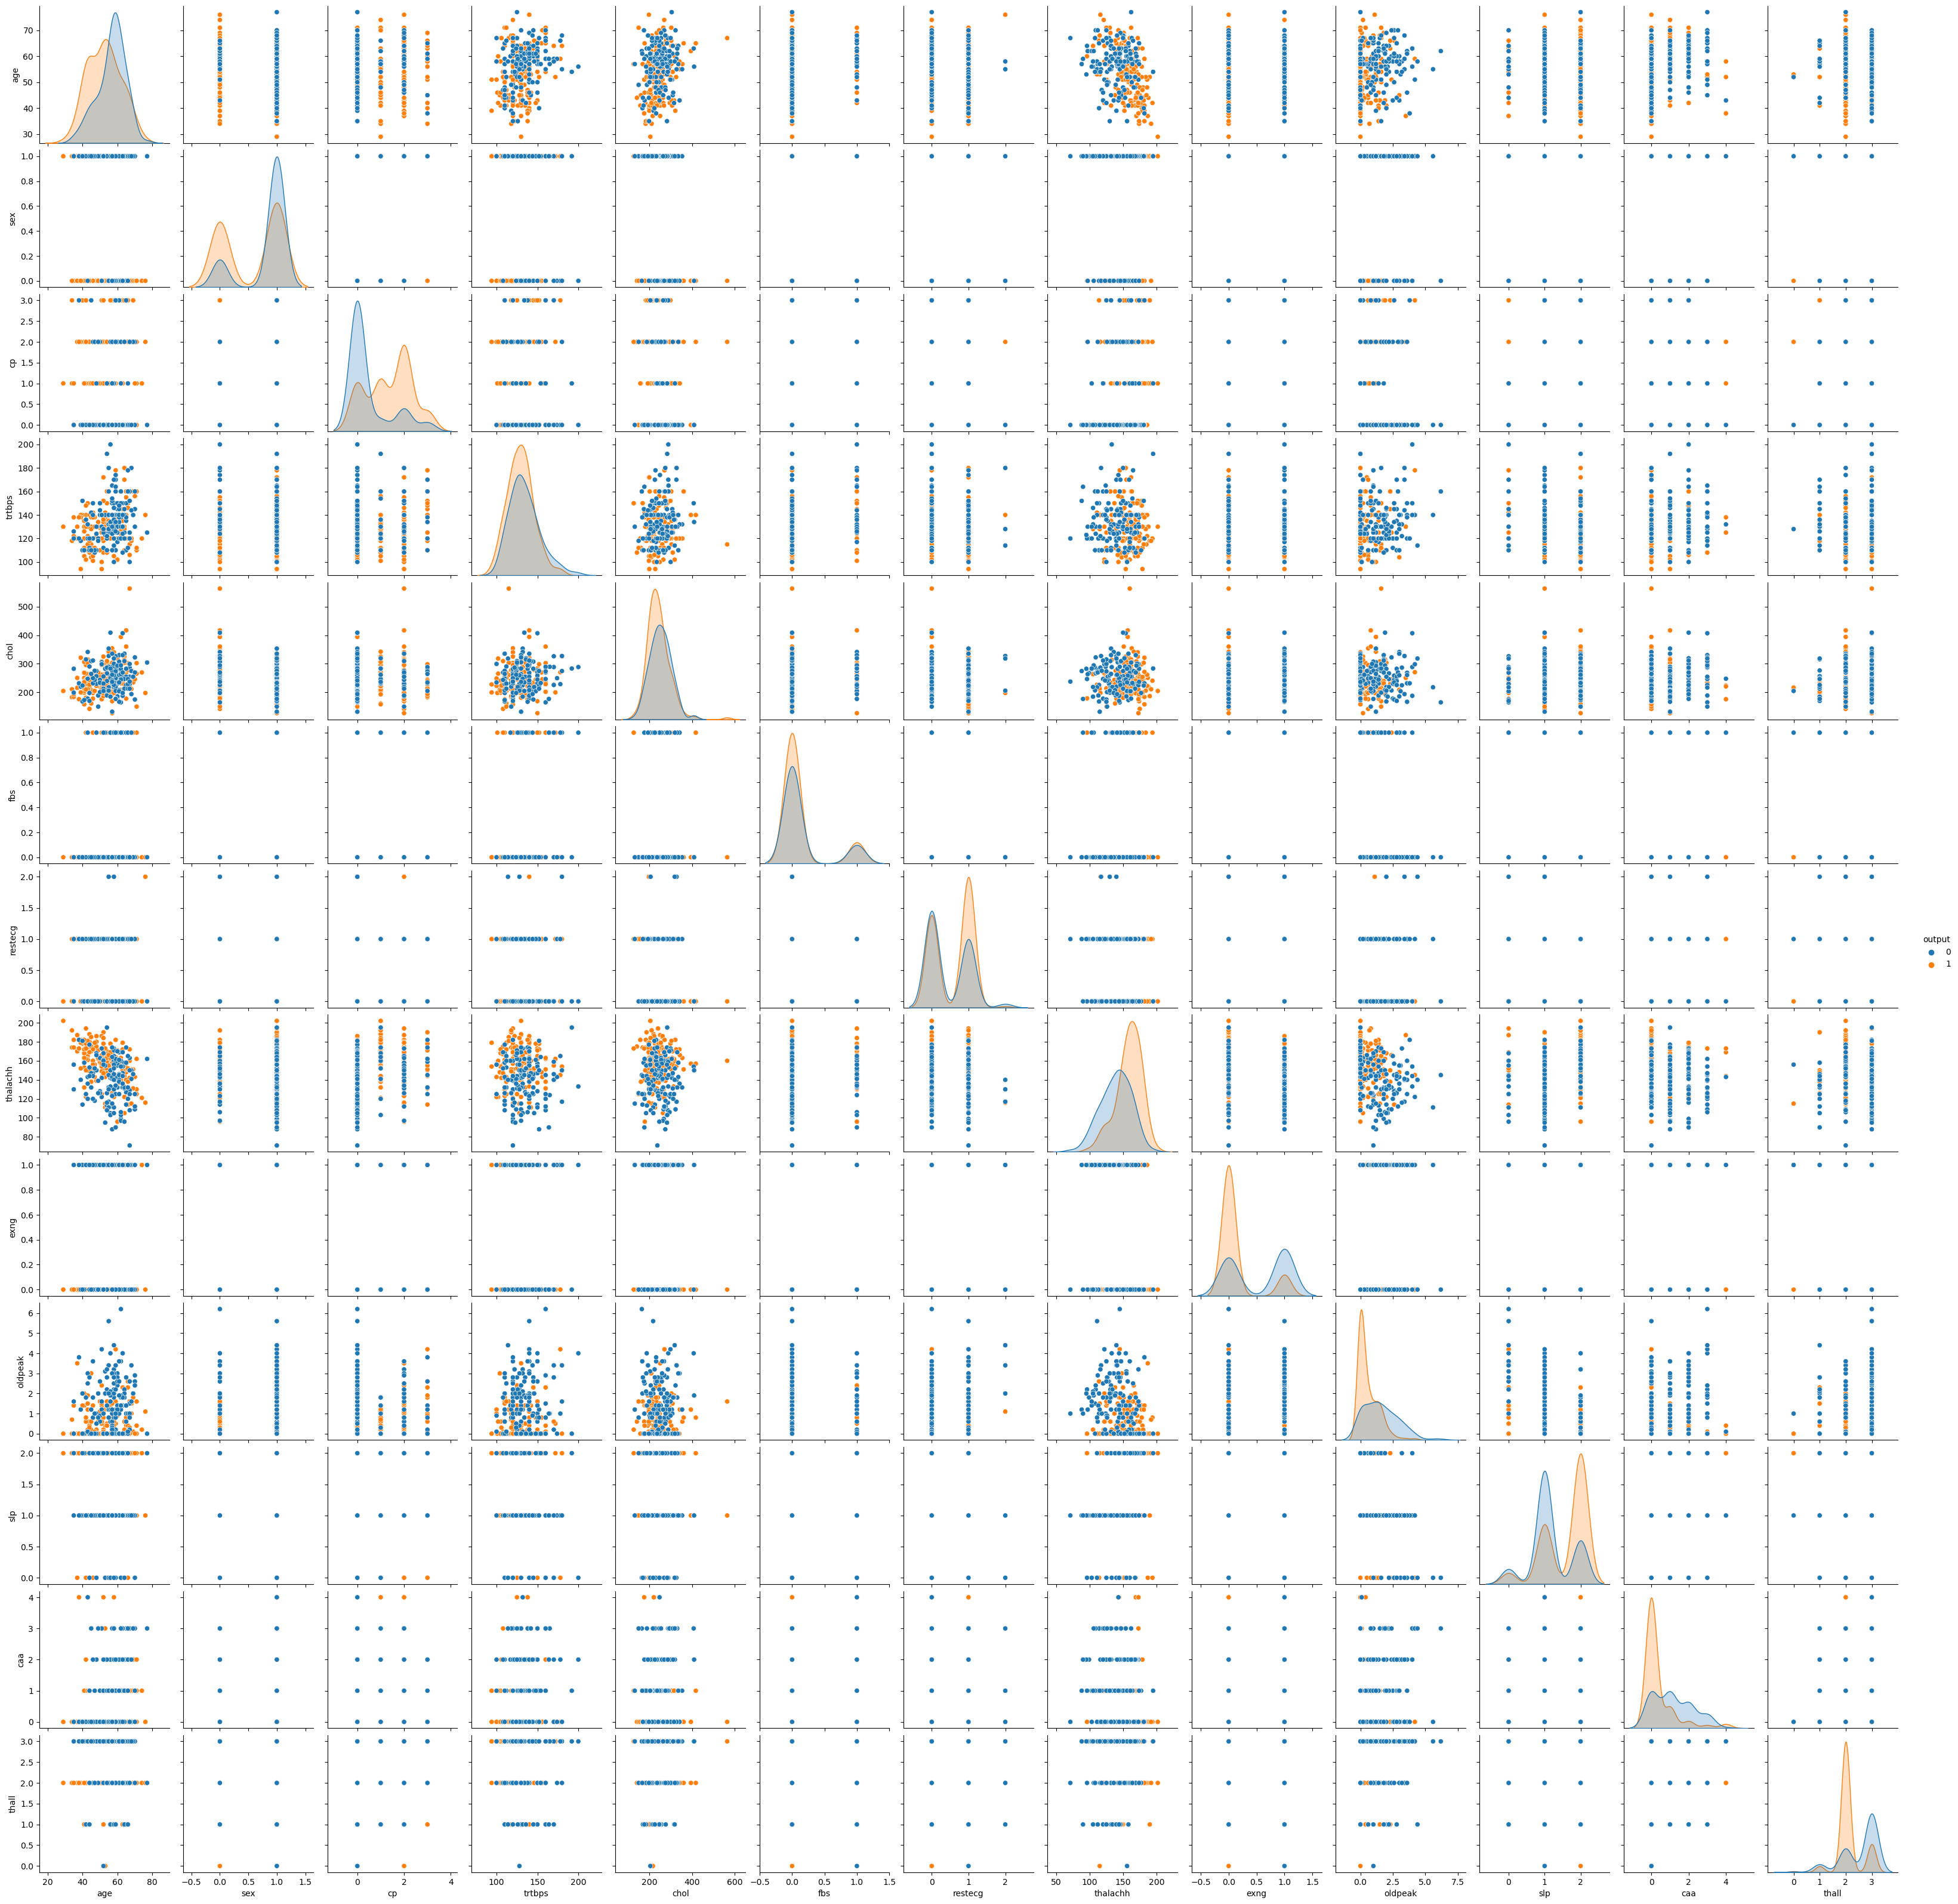

In [9]:
sns.pairplot(df, hue= 'output')

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

In [11]:
ax = sns.countplot(data=df, x='output',palette=['lightgrey','#eeb977'])
ax.set(xticklabels=['Less chance of Heart Attack', 'More chance of Heart Attack'], title="Target Distribution")
ax.tick_params(bottom=False)

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

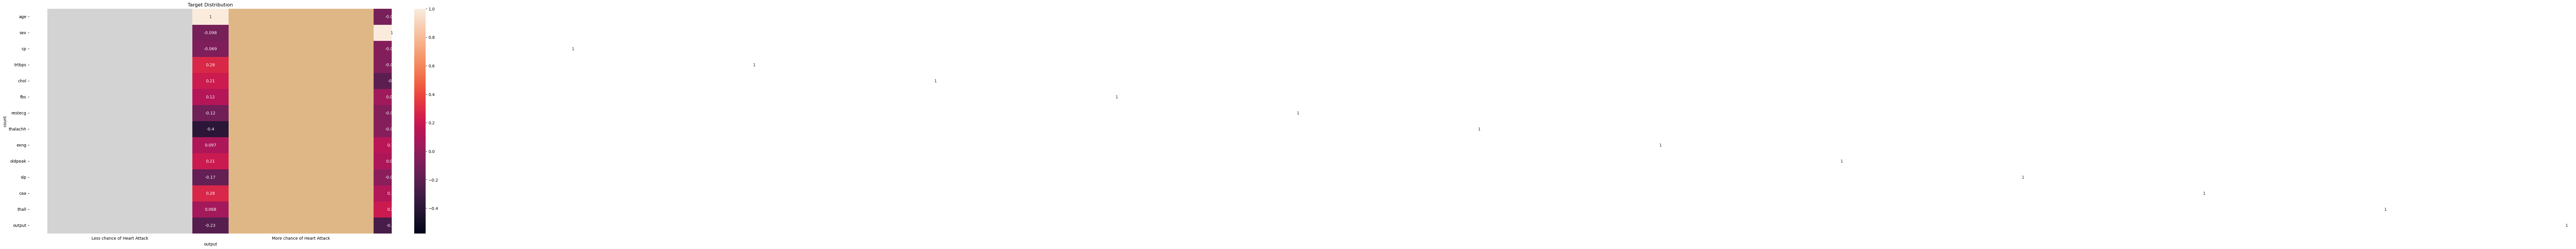

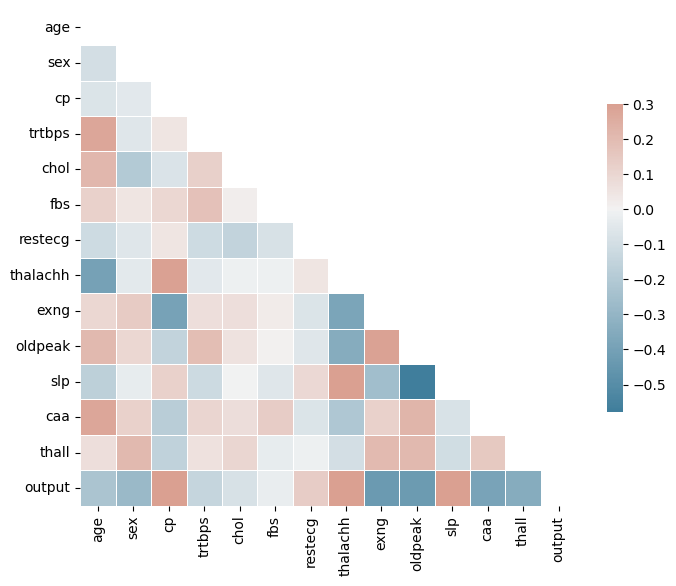

findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


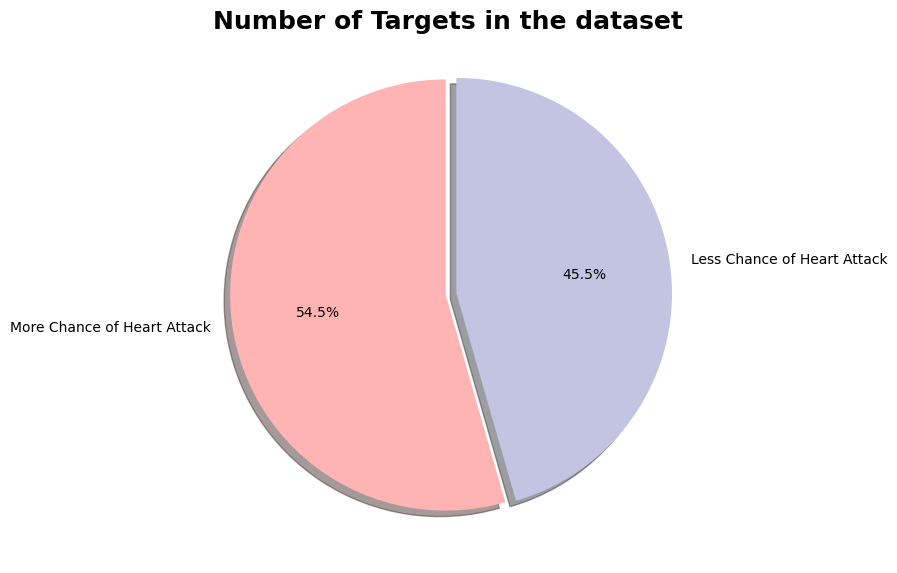

In [13]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = df['output'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, family='Sherif', size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

In [14]:
df.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. Heart Rate',
       'Exercise Induced Angina', 'Previous Peak', 'Slope', 'No. Major Blood Vessels', 'Thal Rate', 'Condition']
colors = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.31,1.02,"Categorical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in df[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax=sns.countplot(data=df, x=i, palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

In [15]:
colors = ['#ccccff','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in df[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=df, x=i, hue='Condition', palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

In [16]:
colors = ['#D0DBEE','#ff3333']
num_cols = ['Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Scatter Plot of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in df[num_cols]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.scatterplot(data=df,x=df['Age'],y=i,hue=df['Condition'],ec='black',palette=colors)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

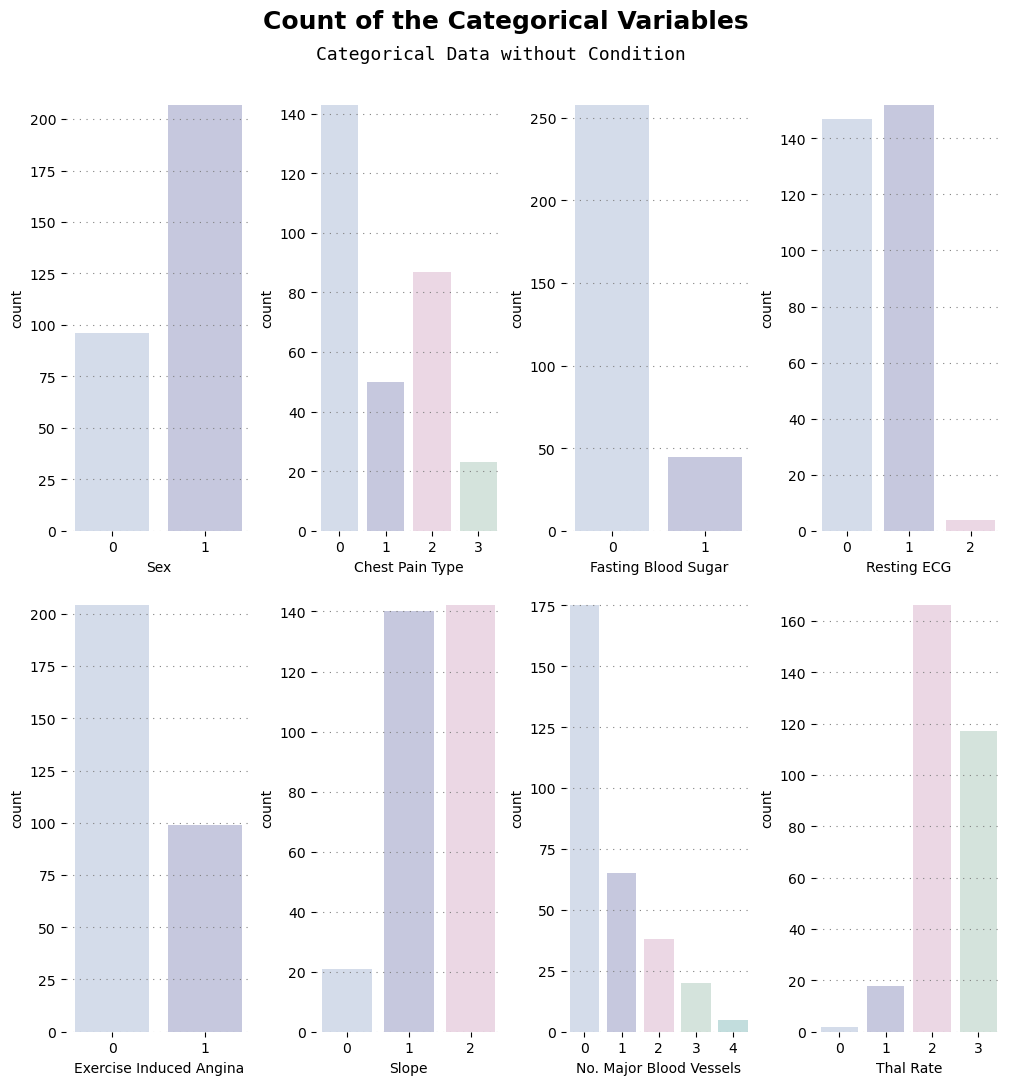

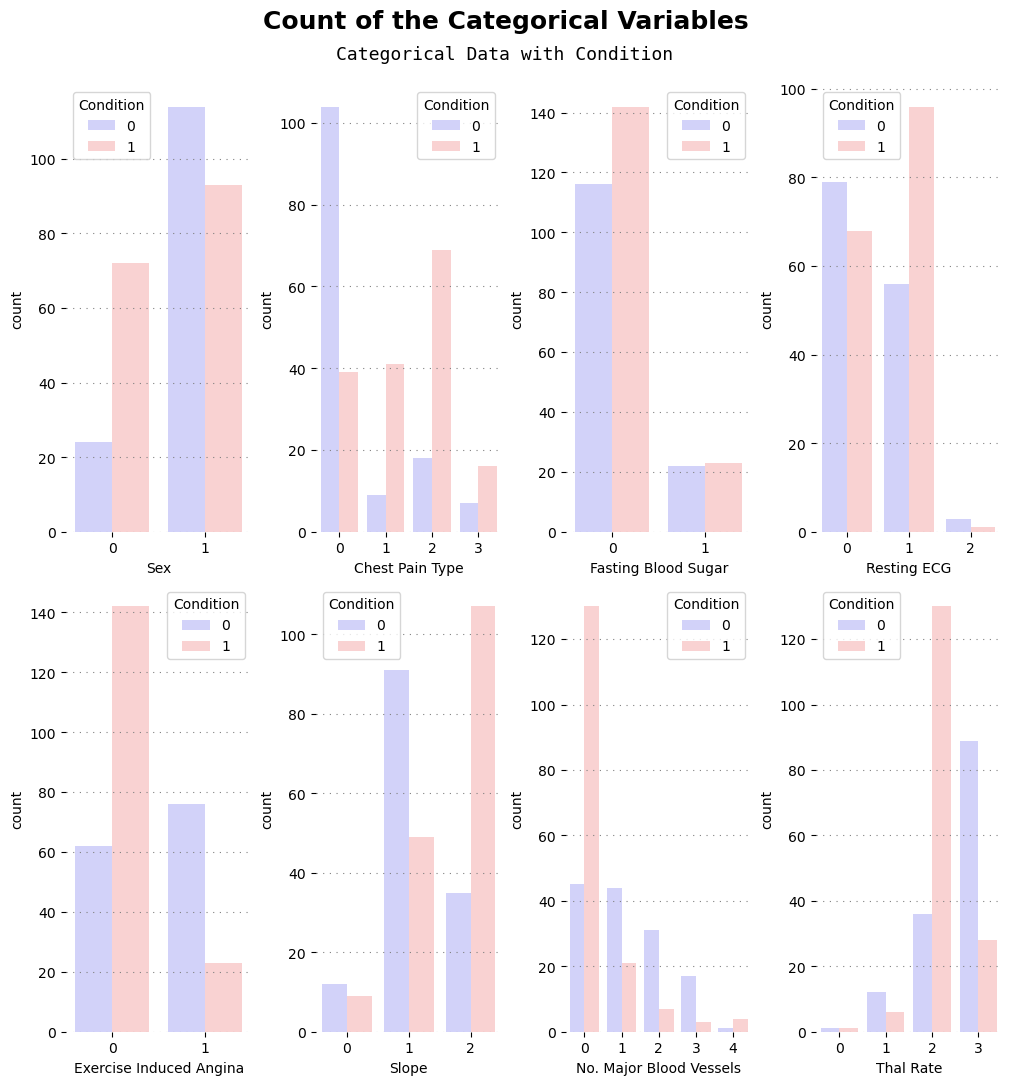

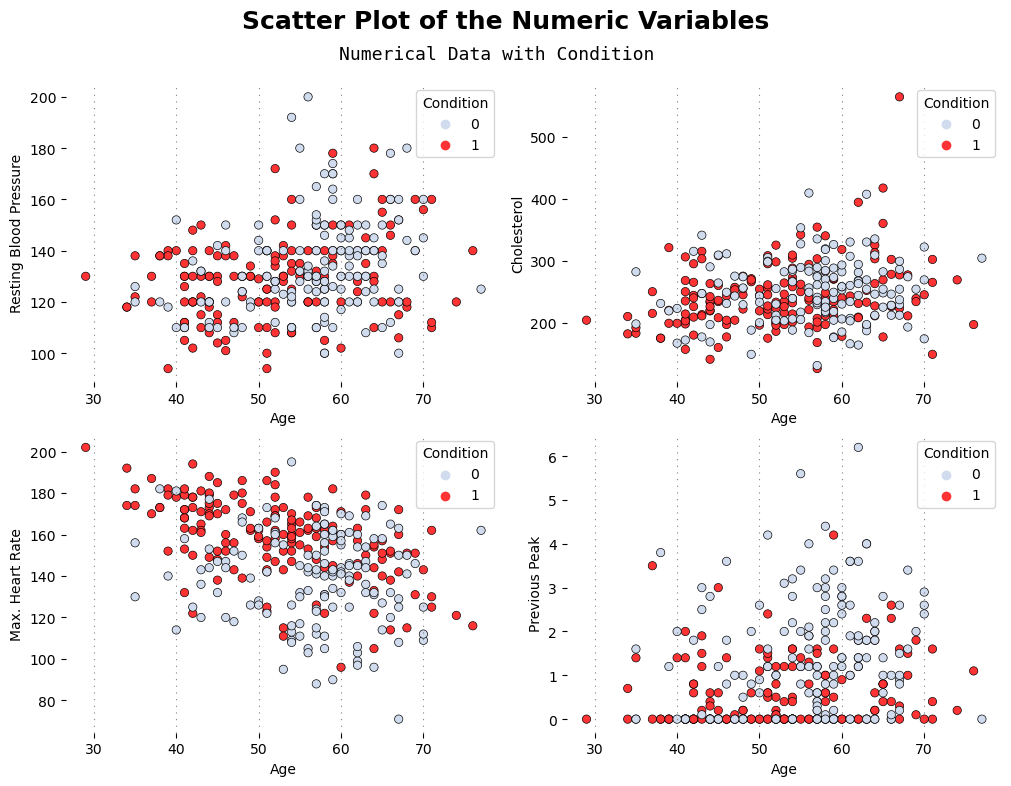

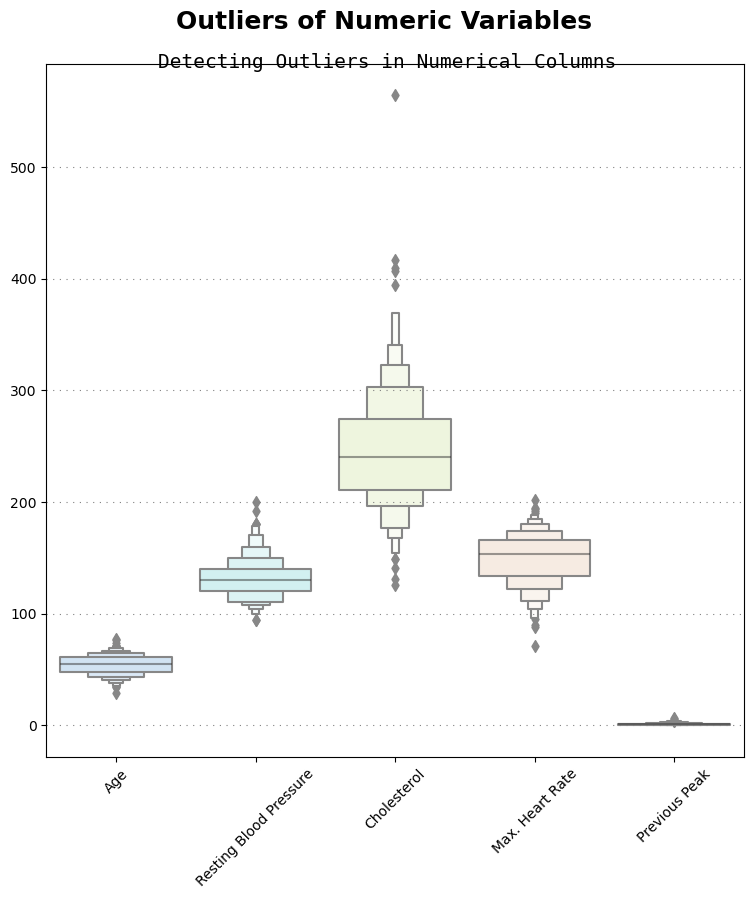

In [17]:
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.4, 1.64, 'Detecting Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = df[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

In [18]:
for i in df[numerical]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[i])
    for j in df[i]:
        if j > Upper_tail or j < Lower_tail:
            df[i] = df[i].replace(j, med)

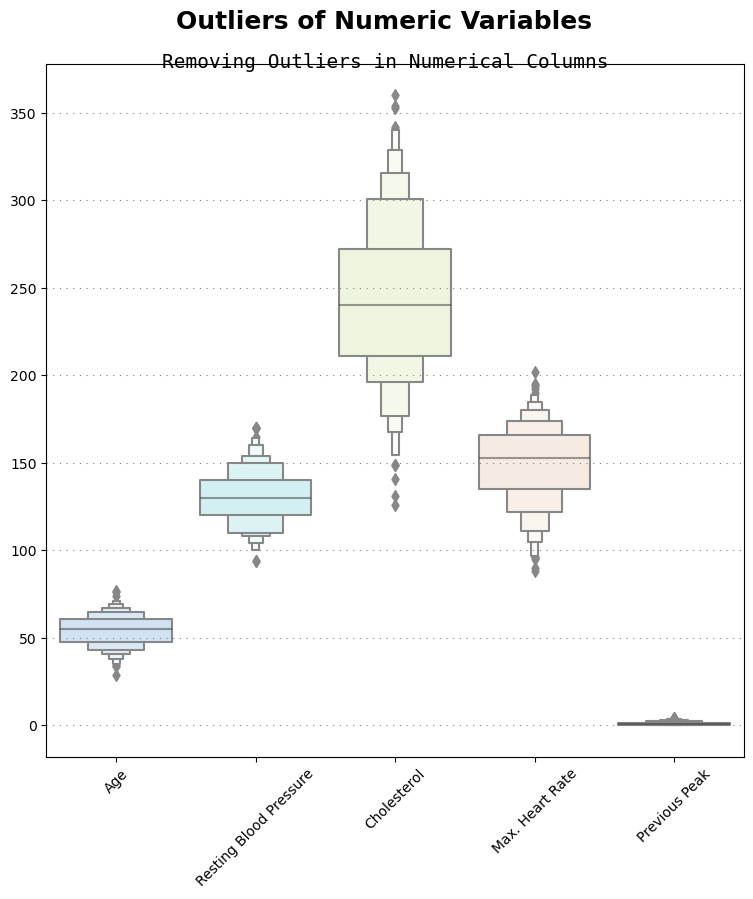

In [19]:
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.405, 1.64, 'Removing Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = df[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

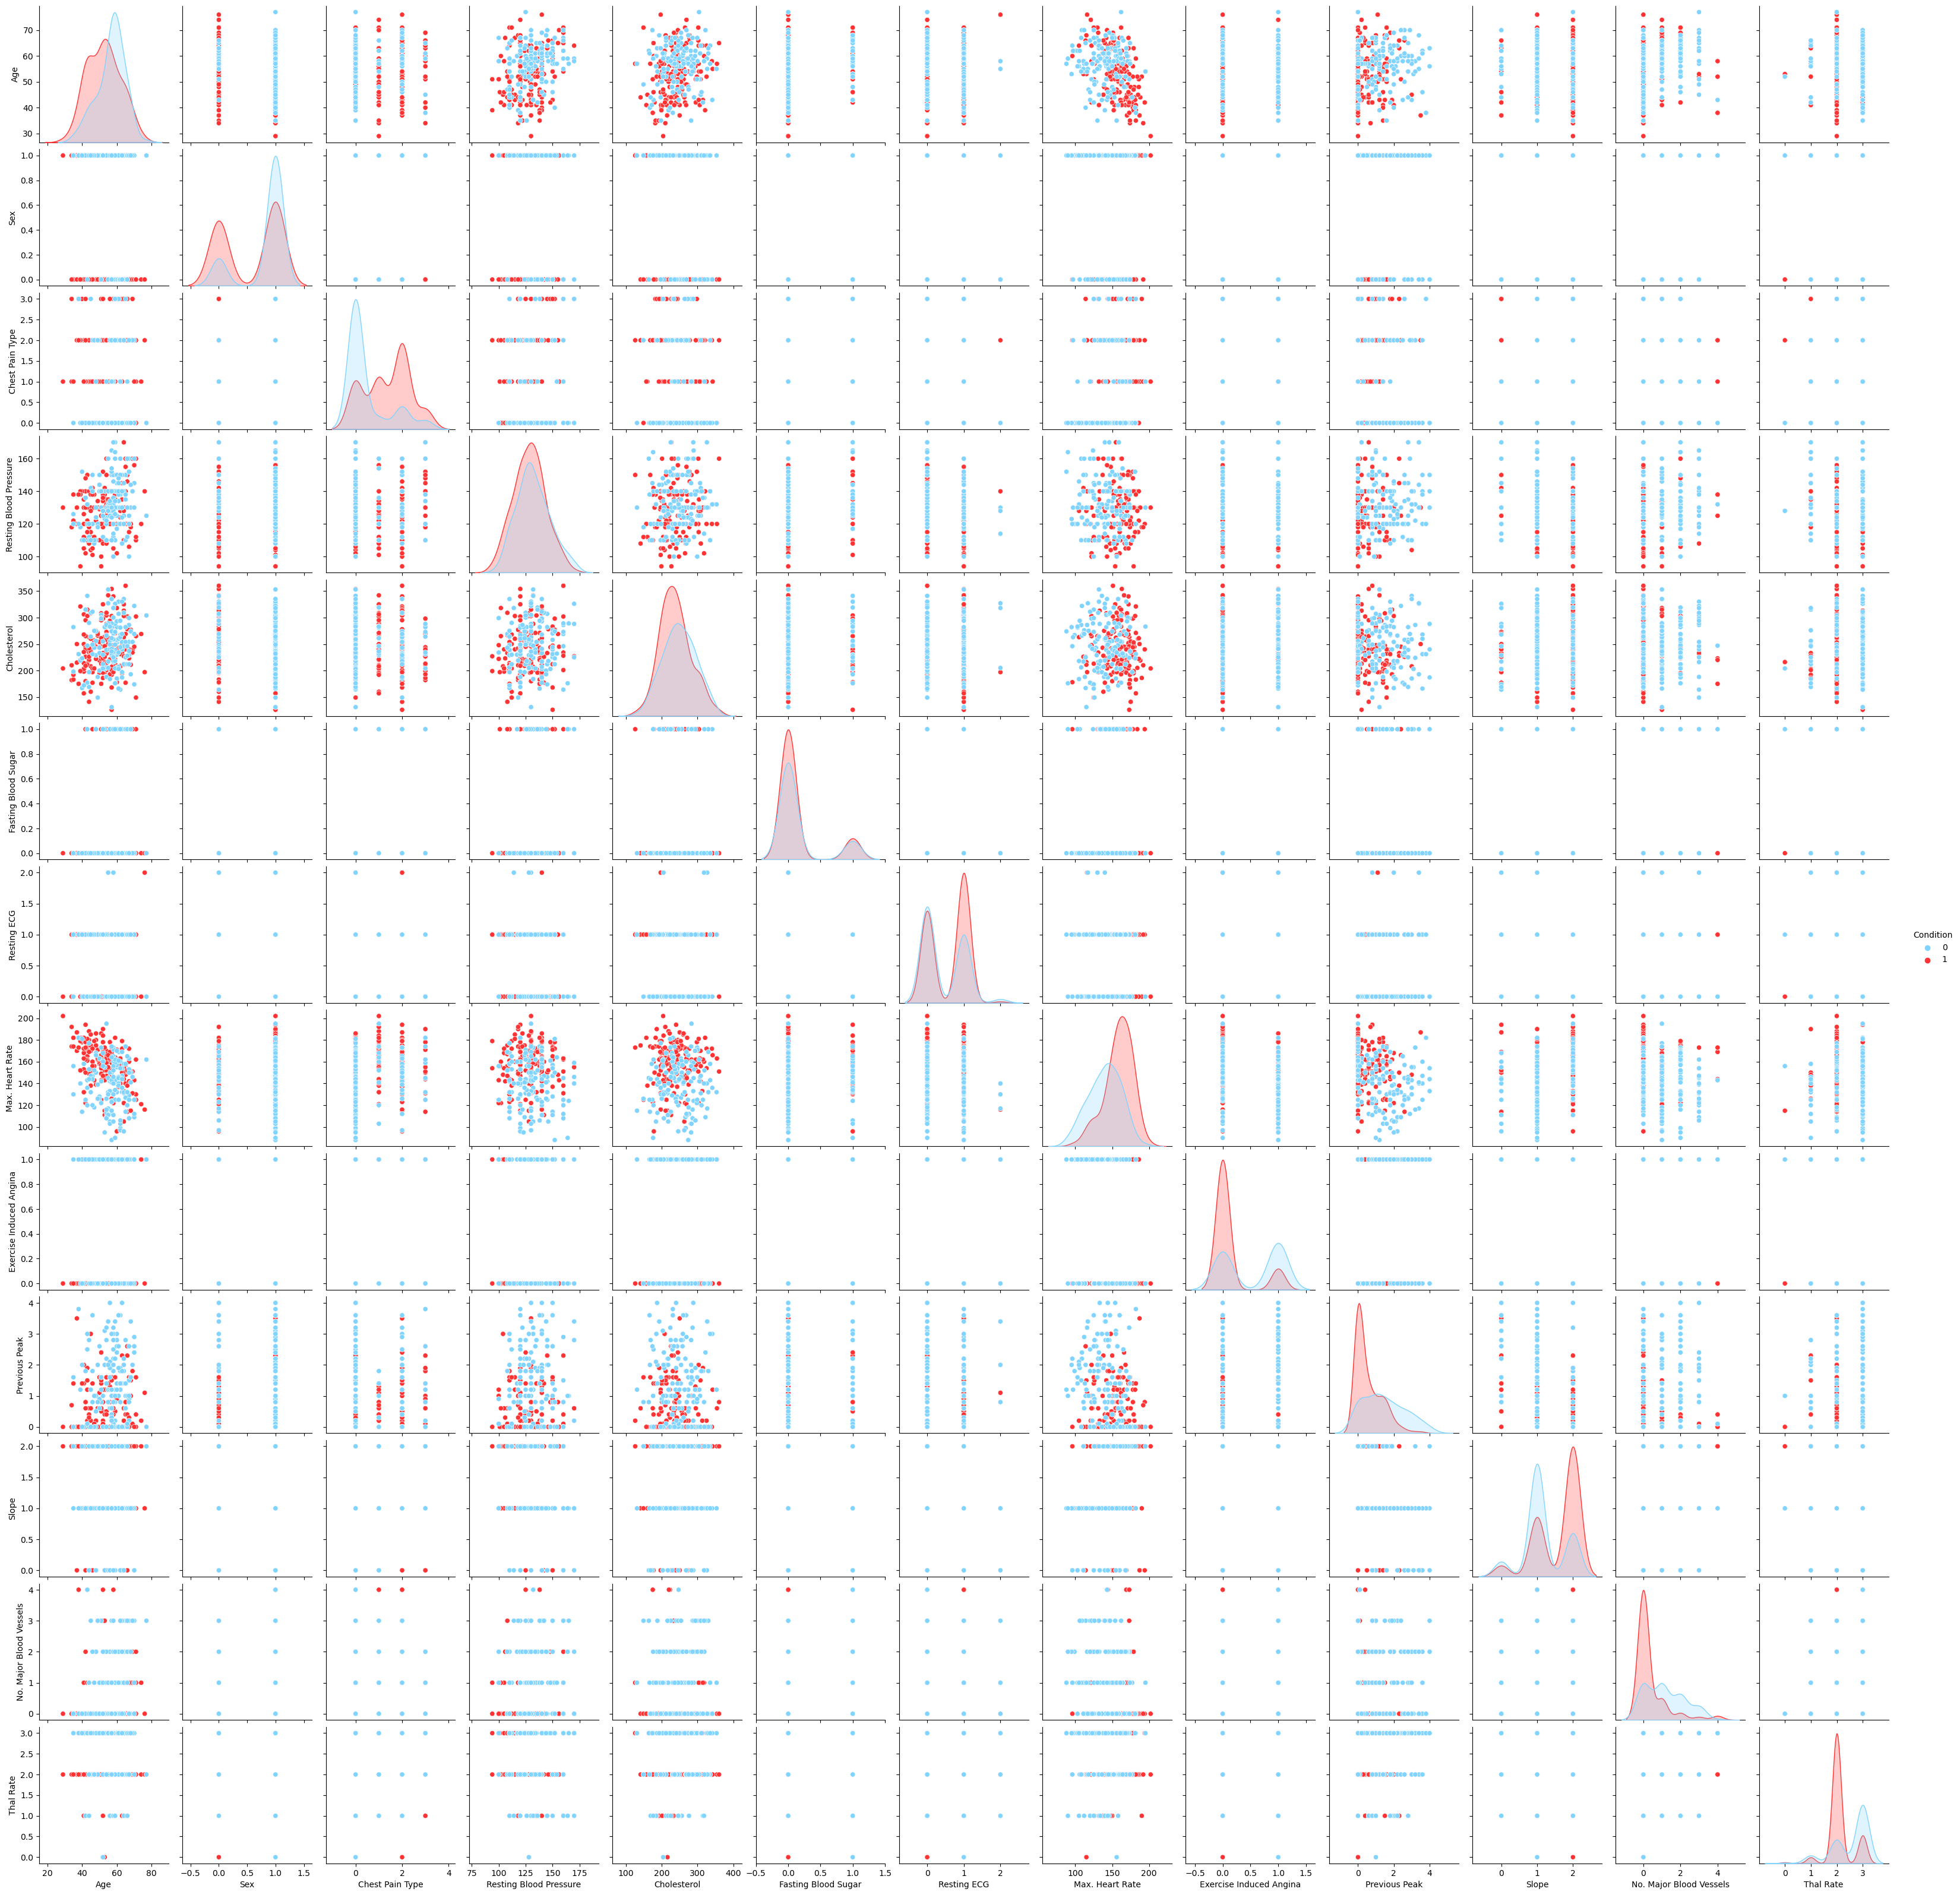

In [20]:
colors = ['#80d4ff','#ff3333']
sns.pairplot(data=df,hue='Condition',diag_kind='kde',palette=colors)
plt.show()

In [21]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [23]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (242, 12) (242,)
Shape for testing data (61, 12) (61,)


In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
x_train,x_test

(array([[-1.43641607,  0.98584243, -0.56416425, ..., -0.66169316,
         -0.70710678, -0.46472917],
        [-1.43641607,  0.98584243,  1.02259893, ..., -0.66169316,
          0.26516504, -0.46472917],
        [ 0.69617712,  0.98584243,  0.62590814, ...,  0.95577901,
         -0.70710678, -0.46472917],
        ...,
        [ 0.69617712,  1.94013791, -0.69639452, ..., -0.66169316,
         -0.70710678,  1.14190596],
        [ 0.69617712,  0.98584243,  0.49367787, ...,  0.95577901,
         -0.70710678, -0.46472917],
        [ 0.69617712,  0.03154696, -0.69639452, ..., -0.66169316,
         -0.70710678, -0.46472917]]),
 array([[ 0.69617712, -0.92274852,  0.9564838 , -1.5117212 , -0.41803981,
          0.90163913, -1.1156067 ,  1.40984195,  1.55210556, -2.27916533,
         -0.70710678,  1.14190596],
        [ 0.69617712,  1.94013791,  2.60936212, -0.35663148, -0.41803981,
         -0.97936664,  0.21432838, -0.70929937, -0.36182843, -0.66169316,
         -0.70710678,  1.14190596],
     

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[21  6]
 [ 3 31]]
The accuracy of Logistic Regression is :  85.24590163934425 %


In [27]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  85.24590163934425 %


In [28]:
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  85.24590163934425 %


In [29]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  83.60655737704919 %


In [30]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[22  5]
 [11 23]]
The accuracy of KNN is :  73.77049180327869 %


/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [36]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

In [37]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[22  5]
 [ 4 30]]
The accuracy of KNN is :  85.24590163934425 %


/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  83.60655737704919 %


/Users/imac/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
